In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


"""
- 주어진 데이터를 이용해서, 데이터 개수를 늘리자
- 샘플 코드에서 decalcom.py 파일을 참고하자
- 데이터 개수를 늘릴때, 각 방향(전진,좌/우회전)별로 거의 같은 수의 데이터가 만들어지도록 하자
- 기본적으로는 직진 데이터가 가장 많을텐데, 한쪽 방향에 대한 데이터만 많으면 
  학습 결과가 편향 될 수 도 있기 때문... 물론 확실한 것은 아니지만...
- original dataset 구성
  Total data counts:  6520
  Stop data counts:  0 , ratio(%):  0.0
  Left data counts:  1387 , ratio(%):  21.3
  strait data counts:  4583 , ratio(%):  70.3
  Right data counts:  550 , ratio(%):  8.4
"""


# In[2]:


import scipy.misc as scimisc
import random
import csv
import numpy as np
import matplotlib.pyplot as pplot
import matplotlib.image as image
from PIL import Image
import cv2
import os
import shutil
import config as cfg

../dataset/20200512/3-increased  폴더를 삭제했습니다.
../dataset/20200512/3-increased  폴더를 생성하고 모든 파일을 복사했습니다.
좌우를 반전하여 데이터 양을 늘립니다


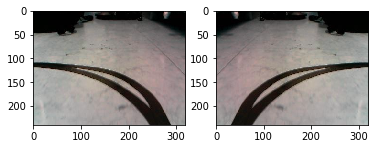

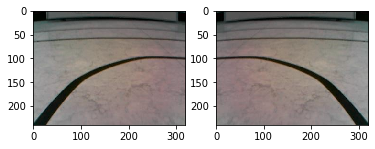

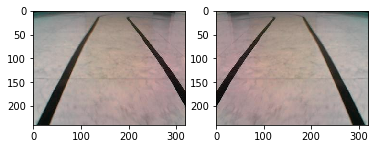

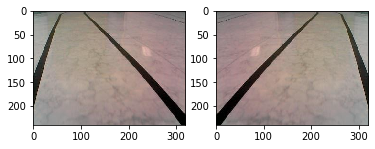

좌우 방향으로 이미지를 약간 이동하여 데이터 양을 늘립니다


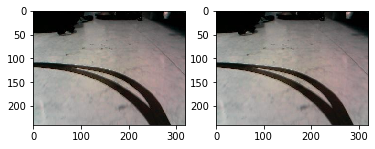

Shift to LEFT by 6


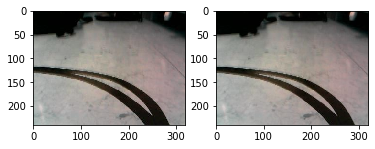

Shift to RIGHT by 9
Cleaned Dataset STAT:
- Total data counts:  6568
- Stop data counts:  0 , ratio(%):  0.0
- Left data counts:  848 , ratio(%):  12.9
- strait data counts:  4829 , ratio(%):  73.5
- Right data counts:  297 , ratio(%):  4.5
- Up Left data counts:  353 , ratio(%):  5.4
- Up Right data counts:  241 , ratio(%):  3.7
Increased Dataset STAT:
- Total data counts:  17639
- Stop data counts:  0 , ratio(%):  0.0
- Left data counts:  3435 , ratio(%):  19.5
- strait data counts:  4829 , ratio(%):  27.4
- Right data counts:  3435 , ratio(%):  19.5
- Up Left data counts:  2970 , ratio(%):  16.8
- Up Right data counts:  2970 , ratio(%):  16.8
Bye~


In [13]:
# In[3]:


# cleaned 폴더에 있는 이미지 파일과 cvs파일을 increased 폴더로 복사
cleaned_path = '../dataset/20200512/2-cleaned'
increased_path = '../dataset/20200512/3-increased'

# increased 폴더가 이미 존재하는지 확인하고, 있다면 삭제하기
# 다른 프로세스가 사용 중이라는 메시지가 나오면, 커널을 재시작
if os.path.isdir(increased_path):
    shutil.rmtree(increased_path)
    print(increased_path, " 폴더를 삭제했습니다.")

# cleaned 폴더를 복사해서 increased 폴더를 생성
shutil.copytree(cleaned_path, increased_path)
print(increased_path, " 폴더를 생성하고 모든 파일을 복사했습니다.")


# In[4]:


filepaths = []  # 이미지의 이름 및 경로를 저장할 버퍼
filenames = []  # 이미지 파일명만 저장할 버퍼
directions = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[5]:


# data.csv 파일 읽어서 이미지 파일명 및 방향키 정보를 저장

with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        filenames.append(row[0])  # 파일명만 저장
        filepaths.append(increased_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        directions.append(int(row[1]))  # 사용자가 입력한 방향키 저장


# In[6]:


csv_handler=open(increased_path + '/data.csv', 'a')  # append 모드로 파일 열기 => 추가를 할 것이므로...

# win10에서 csv 파일에 불필요한 개행이 추가되는 문제 발생. lineterminator 추가해서 해결
csv_writer = csv.writer(csv_handler, lineterminator='\n')


# In[7]:


# 방향키 각각에 대해서 변수를 만들기
#LEFT, FORWARD, RIGHT = 1, 2, 3

# 작업 후에 예제로 출력할 이미지 정보 저장할 변수들
ex_left2right = -1
ex_left2right_original_filepath = -1;
ex_left2right_new_filepath = -1;

ex_right2left = -1
ex_right2left_original_filepath = -1;
ex_right2left_new_filepath = -1;

ex_upright2upleft = -1
ex_upright2upleft_original_filepath = -1;
ex_upright2upleft_new_filepath = -1;

ex_upleft2upright = -1
ex_upleft2upright_original_filepath = -1;
ex_upleft2upright_new_filepath = -1;

print('좌우를 반전하여 데이터 양을 늘립니다')
# 기존 데이터를 변형하여, 학습 데이터 양을 늘리기
for i in range(len(filepaths)):
    if directions[i] is cfg.LEFT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.RIGHT))  # csv 파일에 기록하기
        if ex_left2right is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_left2right = i
            ex_left2right_original_filepath = filepaths[i]
            ex_left2right_new_filepath = new_filepath
    elif directions[i] is cfg.RIGHT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.LEFT))  # csv 파일에 기록하기
        if ex_right2left is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_right2left = i
            ex_right2left_original_filepath = filepaths[i]
            ex_right2left_new_filepath = new_filepath
    elif directions[i] is cfg.UP_LEFT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.UP_RIGHT))  # csv 파일에 기록하기
        if ex_upleft2upright is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_upleft2upright = i
            ex_upleft2upright_original_filepath = filepaths[i]
            ex_upleft2upright_new_filepath = new_filepath        
    elif directions[i] is cfg.UP_RIGHT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.UP_LEFT))  # csv 파일에 기록하기
        if ex_upright2upleft is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_upright2upleft = i
            ex_upright2upleft_original_filepath = filepaths[i]
            ex_upright2upleft_new_filepath = new_filepath            
    else:
        pass  # 직진 방향 데이터는 충분히 많으므로 데이터를 늘리지 않음


# In[8]:


# 파일 닫기
csv_handler.close()
# csv.write는 close 호출 할 필요 없음


# In[9]:


# 좌우 반전 한 결과를 한개 씩 예제로 출력
# 좌 => 우
left2right_original = cv2.imread(ex_left2right_original_filepath)
left2right_new = cv2.imread(ex_left2right_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(left2right_original)
pplot.subplot(1,2,2)
pplot.imshow(left2right_new)

# 좌우반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()


# In[10]:


# 좌우 반전 한 결과를 한개 씩 예제로 출력
# 우 => 좌
right2left_original = cv2.imread(ex_right2left_original_filepath)
right2left_new = cv2.imread(ex_right2left_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(right2left_original)
pplot.subplot(1,2,2)
pplot.imshow(right2left_new)

# 좌우반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()




# 반전 한 결과를 한개 씩 예제로 출력
# 우상 => 좌상
upright2upleft_original = cv2.imread(ex_upright2upleft_original_filepath)
upright2upleft_new = cv2.imread(ex_upright2upleft_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(upright2upleft_original)
pplot.subplot(1,2,2)
pplot.imshow(upright2upleft_new)

# 반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()



# 반전 한 결과를 한개 씩 예제로 출력
# 좌상 => 우상
upleft2upright_original = cv2.imread(ex_upleft2upright_original_filepath)
upleft2upright_new = cv2.imread(ex_upleft2upright_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(upleft2upright_original)
pplot.subplot(1,2,2)
pplot.imshow(upleft2upright_new)

# 반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()


# In[11]:


# 데이터를 추가로 증폭하자!
# 이미지 수가 증가했으니, 다시 처음부터 시작
filepaths = []  # 이미지의 이름 및 경로를 저장할 버퍼
filenames = []  # 이미지 파일명만 저장할 버퍼
directions = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[12]:


# data.csv 파일 읽어서 이미지 파일명 및 방향키 정보를 저장

with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        filenames.append(row[0])  # 파일명만 저장
        filepaths.append(increased_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        directions.append(int(row[1]))  # 사용자가 입력한 방향키 저장


# In[13]:


# 데이터를 추가로 증폭하자
# 좌우반전만 하고나서 통계를 보니까, LEFT/RIGHT에 비해서 FORWARD가 2배 많다.
# 추가로 좌우 데이터를 2배씩 늘릴 수 있는 방법을 생각하자

# 좌/우 이미지를 대상으로 좌/우 방향으로 random shift
# shift 하고 빈 공간을 메꾸기 위해서 resize를 다시 하려고 했는데,
# 이미 한번 resize 한 이미지는 실시간으로 ai car가 보게될 화면이니까
# 그러려니 하겠는데, 여기서 한번 더 resize 해 버리면, 왜곡된 이미지는
# ai car에 feed 될 이미지랑은 다른 변환을 거친 이미지라서, 좀 걱적되네
# 그냥, shift 하고, 빈 공간은 인접한 픽셀을 연속해서 붙이는 식으로 하자
# cv2.resize 함수에서 interpolation 인자값을 설정하면 됨

SHIFT_MIN, SHIFT_MAX = 1, 10
TARGET_WIDTH, TARGET_HEIGHT = 320, 240

# 왼쪽으로 shift 한 이미지 1개를 예제로 저장하고, 나중에 화면에 출력
left_shift_amt = -1;
before_left_shift_filepath = -1
after_left_shift_filepath = -1;

# 오른쪽으로 shift 한 이미지 1개를 예제로 저장하고, 나중에 화면에 출력
right_shift_amt = -1
before_right_shift_filepath = -1
after_right_shift_filepath = -1


# In[14]:


csv_handler=open(increased_path + '/data.csv','a')  # append 모드로 파일 열기 => 추가를 할 것이므로...

# win10에서 csv 파일에 불필요한 개행이 추가되는 문제 발생. lineterminator 추가해서 해결
csv_writer = csv.writer(csv_handler, lineterminator='\n')


# In[15]:

print('좌우 방향으로 이미지를 약간 이동하여 데이터 양을 늘립니다')
# 직진/정지 이미지를 제외한 모든 다른 이미지 대상으로 shift를 적용하자, 3 픽셀만 이동?
for _ in range(2):
    for i in range(len(filepaths)):
        #if (directions[i] is LEFT) or (directions[i] is RIGHT):
        #if (directions[i] is cfg.LEFT) or (directions[i] is cfg.RIGHT) or (directions[i] is cfg.UP_RIGHT) or (directions[i] is cfg.UP_LEFT):
        if (directions[i] is cfg.LEFT) or (directions[i] is cfg.RIGHT):
            # 원본 이미지 불러오기
            original_img = cv2.imread(filepaths[i])
            # w, h = original_img.shape
            # print('original : width(%d), height(%d)' % (w, h))

            # 이미지를 좌/우로 얼만큼 shift 할지를 임의로 설정
            shift_amt = random.randint(SHIFT_MIN,SHIFT_MAX)
            # print('Shift amount : %d' % (shift_amt))

            # 이미지를 좌/우 어느 방향으로 shift 할지를 설정
            if random.random() >= 0.5:  # 50% 확률로 to LEFT
                # 왼쪽으로 shift
                left_shifted_img = original_img[:,shift_amt:]
                # w, h = left_shifted_img.shape
                # print('left_shifted_img : width(%d), height(%d)' % (w,h))

                # 왼쪽으로 shift 이후, resize
                left_shifted_img_resized = cv2.resize(left_shifted_img, 
                                                      dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                      interpolation=cv2.INTER_AREA)
                # w, h = left_shifted_img_resized.shape
                # print('left_shifted_img_resized : width(%d), height(%d)' % (w,h))

                shifted_img_filename = 'shift2left_' + filenames[i]
                shifted_img_filepath = increased_path + '/' + shifted_img_filename
                cv2.imwrite(shifted_img_filepath, left_shifted_img_resized)
                csv_writer.writerow((shifted_img_filename, directions[i]))

                if left_shift_amt < 0:
                    left_shift_amt = shift_amt
                    before_left_shift_filepath = filepaths[i]
                    after_left_shift_filepath = shifted_img_filepath

            else:  # 50% 확률로 to RIGHT
                # 오른쪽으로 shift
                right_shifted_img = original_img[:,:-shift_amt]
                # w, h = right_shifted_img.shape
                # print('right_shifted_img : width(%d), height(%d)' % (w,h))

                # 오른쪽으로 shift 이후, resize
                right_shifted_img_resized = cv2.resize(right_shifted_img, 
                                                       dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                       interpolation=cv2.INTER_AREA)
                # w, h = right_shifted_img_resized.shape
                # print('right_shifted_img_resized : width(%d), height(%d)' % (w,h))

                shifted_img_filename = 'shift2right_' + filenames[i]
                shifted_img_filepath = increased_path + '/' + shifted_img_filename
                cv2.imwrite(shifted_img_filepath, right_shifted_img_resized)
                csv_writer.writerow((shifted_img_filename, directions[i]))

                if right_shift_amt < 0:            
                    right_shift_amt = shift_amt
                    before_right_shift_filepath = filepaths[i]
                    after_right_shift_filepath = shifted_img_filepath
                    
        elif (directions[i] is cfg.UP_RIGHT) or (directions[i] is cfg.UP_LEFT):
            for _ in range(2):
                # 원본 이미지 불러오기
                original_img = cv2.imread(filepaths[i])
                # w, h = original_img.shape
                # print('original : width(%d), height(%d)' % (w, h))

                # 이미지를 좌/우로 얼만큼 shift 할지를 임의로 설정
                shift_amt = random.randint(SHIFT_MIN,SHIFT_MAX)
                # print('Shift amount : %d' % (shift_amt))

                # 이미지를 좌/우 어느 방향으로 shift 할지를 설정
                if random.random() >= 0.5:  # 50% 확률로 to LEFT
                    # 왼쪽으로 shift
                    left_shifted_img = original_img[:,shift_amt:]
                    # w, h = left_shifted_img.shape
                    # print('left_shifted_img : width(%d), height(%d)' % (w,h))

                    # 왼쪽으로 shift 이후, resize
                    left_shifted_img_resized = cv2.resize(left_shifted_img, 
                                                          dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                          interpolation=cv2.INTER_AREA)
                    # w, h = left_shifted_img_resized.shape
                    # print('left_shifted_img_resized : width(%d), height(%d)' % (w,h))

                    shifted_img_filename = 'shift2left_' + filenames[i]
                    shifted_img_filepath = increased_path + '/' + shifted_img_filename
                    cv2.imwrite(shifted_img_filepath, left_shifted_img_resized)
                    csv_writer.writerow((shifted_img_filename, directions[i]))

                    if left_shift_amt < 0:
                        left_shift_amt = shift_amt
                        before_left_shift_filepath = filepaths[i]
                        after_left_shift_filepath = shifted_img_filepath

                else:  # 50% 확률로 to RIGHT
                    # 오른쪽으로 shift
                    right_shifted_img = original_img[:,:-shift_amt]
                    # w, h = right_shifted_img.shape
                    # print('right_shifted_img : width(%d), height(%d)' % (w,h))

                    # 오른쪽으로 shift 이후, resize
                    right_shifted_img_resized = cv2.resize(right_shifted_img, 
                                                           dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                           interpolation=cv2.INTER_AREA)
                    # w, h = right_shifted_img_resized.shape
                    # print('right_shifted_img_resized : width(%d), height(%d)' % (w,h))

                    shifted_img_filename = 'shift2right_' + filenames[i]
                    shifted_img_filepath = increased_path + '/' + shifted_img_filename
                    cv2.imwrite(shifted_img_filepath, right_shifted_img_resized)
                    csv_writer.writerow((shifted_img_filename, directions[i]))

                    if right_shift_amt < 0:            
                        right_shift_amt = shift_amt
                        before_right_shift_filepath = filepaths[i]
                        after_right_shift_filepath = shifted_img_filepath                

# In[16]:


# 파일 닫기
csv_handler.close()
# csv.write는 close 호출 할 필요 없음


# In[17]:


# 왼쪽으로 shift한 이미지를 예제로 화면에 1개씩 표시
assert left_shift_amt >= 0

# 이미지를 화면에 표시
original_img = cv2.imread(before_left_shift_filepath)
pplot.subplot(1,2,1)
pplot.imshow(original_img)

shift2left_img = cv2.imread(after_left_shift_filepath)
pplot.subplot(1,2,2)
pplot.imshow(shift2left_img)

pplot.show()
print('Shift to LEFT by %d' % (left_shift_amt))


# In[18]:


# 오른쪽으로 shift한 이미지를 예제로 화면에 1개씩 표시
assert right_shift_amt >= 0

# 이미지를 화면에 표시
original_img = cv2.imread(before_right_shift_filepath)
pplot.subplot(1,2,1)
pplot.imshow(original_img)

shift2right_img = cv2.imread(after_right_shift_filepath)
pplot.subplot(1,2,2)
pplot.imshow(shift2right_img)

pplot.show()
print('Shift to RIGHT by %d' % (right_shift_amt))


# In[19]:


# 데이터 통계 내기 : cleaned dataset

# 각 방향키 별로 몇개의 데이터가 있는지를 카운트
cleaned_wheel0 = 0
cleaned_wheel1 = 0
cleaned_wheel2 = 0
cleaned_wheel3 = 0
cleaned_wheel4 = 0
cleaned_wheel5 = 0
cleaned_total = 0
with open(cleaned_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        cleaned_total += 1
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        # print(row[0], row[1])
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            cleaned_wheel0 += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            cleaned_wheel1 += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            cleaned_wheel2 += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            cleaned_wheel3 += 1
        elif int(row[1]) == cfg.UP_LEFT:  # 4 = 직좌
            cleaned_wheel4 += 1
        elif int(row[1]) == cfg.UP_RIGHT:  # 5 = 직우
            cleaned_wheel5 += 1
        else:
            pass

print('Cleaned Dataset STAT:')
print('- Total data counts: ', cleaned_total)
print('- Stop data counts: ', cleaned_wheel0, ', ratio(%):', ' %0.1f' % (cleaned_wheel0/cleaned_total*100))
print('- Left data counts: ', cleaned_wheel1, ', ratio(%):', ' %0.1f' % (cleaned_wheel1/cleaned_total*100))
print('- strait data counts: ', cleaned_wheel2, ', ratio(%):', ' %0.1f' % (cleaned_wheel2/cleaned_total*100))
print('- Right data counts: ', cleaned_wheel3, ', ratio(%):', ' %0.1f' % (cleaned_wheel3/cleaned_total*100))
print('- Up Left data counts: ', cleaned_wheel4, ', ratio(%):', ' %0.1f' % (cleaned_wheel4/cleaned_total*100))
print('- Up Right data counts: ', cleaned_wheel5, ', ratio(%):', ' %0.1f' % (cleaned_wheel5/cleaned_total*100))


# In[21]:


# 데이터 통계 내기 : increased dataset

# 각 방향키 별로 몇개의 데이터가 있는지를 카운트
increased_wheel0 = 0
increased_wheel1 = 0
increased_wheel2 = 0
increased_wheel3 = 0
increased_wheel4 = 0
increased_wheel5 = 0
increased_total = 0
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        increased_total += 1
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        # print(row[0], row[1])
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            increased_wheel0 += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            increased_wheel1 += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            increased_wheel2 += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            increased_wheel3 += 1
        elif int(row[1]) == cfg.UP_LEFT:  
            increased_wheel4 += 1
        elif int(row[1]) == cfg.UP_RIGHT:  
            increased_wheel5 += 1
        else:
            pass
                
print('Increased Dataset STAT:')
print('- Total data counts: ', increased_total)
print('- Stop data counts: ', increased_wheel0, ', ratio(%):', 
      ' %0.1f' % (increased_wheel0/increased_total*100))
print('- Left data counts: ', increased_wheel1, ', ratio(%):', 
      ' %0.1f' % (increased_wheel1/increased_total*100))
print('- strait data counts: ', increased_wheel2, ', ratio(%):', 
      ' %0.1f' % (increased_wheel2/increased_total*100))
print('- Right data counts: ', increased_wheel3, ', ratio(%):', 
      ' %0.1f' % (increased_wheel3/increased_total*100))

print('- Up Left data counts: ', increased_wheel4, ', ratio(%):', 
      ' %0.1f' % (increased_wheel4/increased_total*100))
print('- Up Right data counts: ', increased_wheel5, ', ratio(%):', 
      ' %0.1f' % (increased_wheel5/increased_total*100))


# In[ ]:


print('Bye~')
# THE END

../dataset/20200513/3-increased  폴더를 삭제했습니다.
../dataset/20200513/3-increased  폴더를 생성하고 모든 파일을 복사했습니다.
좌우를 반전하여 데이터 양을 늘립니다


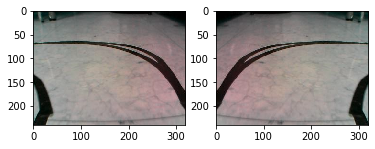

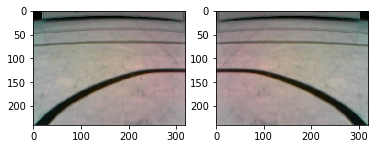

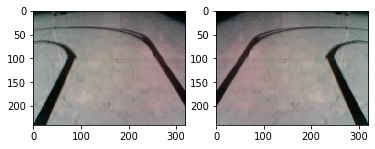

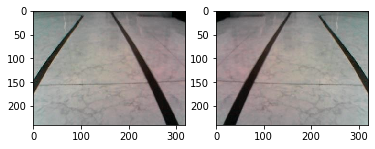

좌우 방향으로 이미지를 약간 이동하여 데이터 양을 늘립니다


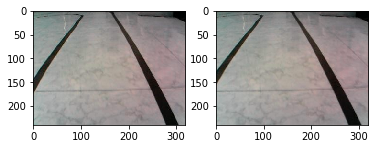

Shift to LEFT by 10


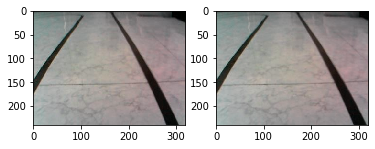

Shift to RIGHT by 4
Cleaned Dataset STAT:
- Total data counts:  3674
- Stop data counts:  0 , ratio(%):  0.0
- Left data counts:  392 , ratio(%):  10.7
- strait data counts:  2718 , ratio(%):  74.0
- Right data counts:  127 , ratio(%):  3.5
- Up Left data counts:  315 , ratio(%):  8.6
- Up Right data counts:  122 , ratio(%):  3.3
Increased Dataset STAT:
- Total data counts:  10202
- Stop data counts:  0 , ratio(%):  0.0
- Left data counts:  1557 , ratio(%):  15.3
- strait data counts:  2718 , ratio(%):  26.6
- Right data counts:  1557 , ratio(%):  15.3
- Up Left data counts:  2185 , ratio(%):  21.4
- Up Right data counts:  2185 , ratio(%):  21.4
Bye~


In [14]:
# In[3]:


# cleaned 폴더에 있는 이미지 파일과 cvs파일을 increased 폴더로 복사
cleaned_path = '../dataset/20200513/2-cleaned'
increased_path = '../dataset/20200513/3-increased'

# increased 폴더가 이미 존재하는지 확인하고, 있다면 삭제하기
# 다른 프로세스가 사용 중이라는 메시지가 나오면, 커널을 재시작
if os.path.isdir(increased_path):
    shutil.rmtree(increased_path)
    print(increased_path, " 폴더를 삭제했습니다.")

# cleaned 폴더를 복사해서 increased 폴더를 생성
shutil.copytree(cleaned_path, increased_path)
print(increased_path, " 폴더를 생성하고 모든 파일을 복사했습니다.")


# In[4]:


filepaths = []  # 이미지의 이름 및 경로를 저장할 버퍼
filenames = []  # 이미지 파일명만 저장할 버퍼
directions = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[5]:


# data.csv 파일 읽어서 이미지 파일명 및 방향키 정보를 저장

with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        filenames.append(row[0])  # 파일명만 저장
        filepaths.append(increased_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        directions.append(int(row[1]))  # 사용자가 입력한 방향키 저장


# In[6]:


csv_handler=open(increased_path + '/data.csv', 'a')  # append 모드로 파일 열기 => 추가를 할 것이므로...

# win10에서 csv 파일에 불필요한 개행이 추가되는 문제 발생. lineterminator 추가해서 해결
csv_writer = csv.writer(csv_handler, lineterminator='\n')


# In[7]:


# 방향키 각각에 대해서 변수를 만들기
#LEFT, FORWARD, RIGHT = 1, 2, 3

# 작업 후에 예제로 출력할 이미지 정보 저장할 변수들
ex_left2right = -1
ex_left2right_original_filepath = -1;
ex_left2right_new_filepath = -1;

ex_right2left = -1
ex_right2left_original_filepath = -1;
ex_right2left_new_filepath = -1;

ex_upright2upleft = -1
ex_upright2upleft_original_filepath = -1;
ex_upright2upleft_new_filepath = -1;

ex_upleft2upright = -1
ex_upleft2upright_original_filepath = -1;
ex_upleft2upright_new_filepath = -1;

print('좌우를 반전하여 데이터 양을 늘립니다')
# 기존 데이터를 변형하여, 학습 데이터 양을 늘리기
for i in range(len(filepaths)):
    if directions[i] is cfg.LEFT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.RIGHT))  # csv 파일에 기록하기
        if ex_left2right is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_left2right = i
            ex_left2right_original_filepath = filepaths[i]
            ex_left2right_new_filepath = new_filepath
    elif directions[i] is cfg.RIGHT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.LEFT))  # csv 파일에 기록하기
        if ex_right2left is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_right2left = i
            ex_right2left_original_filepath = filepaths[i]
            ex_right2left_new_filepath = new_filepath
    elif directions[i] is cfg.UP_LEFT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.UP_RIGHT))  # csv 파일에 기록하기
        if ex_upleft2upright is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_upleft2upright = i
            ex_upleft2upright_original_filepath = filepaths[i]
            ex_upleft2upright_new_filepath = new_filepath        
    elif directions[i] is cfg.UP_RIGHT:
        original_img = cv2.imread(filepaths[i])
        flipped_img = cv2.flip(original_img, 1)  # 1 : 좌우 반전, 0 : 상하 반전
        new_filname = 'flip_' + filenames[i]  # 새로운 파일명
        new_filepath = increased_path + '/' + new_filname  # 새로운 파일 경로
        cv2.imwrite(new_filepath, flipped_img)  # 새로운 이미지 파일 생성
        csv_writer.writerow((new_filname, cfg.UP_LEFT))  # csv 파일에 기록하기
        if ex_upright2upleft is -1:  # 예제로 출력하도록, 인덱스값 저장
            ex_upright2upleft = i
            ex_upright2upleft_original_filepath = filepaths[i]
            ex_upright2upleft_new_filepath = new_filepath            
    else:
        pass  # 직진 방향 데이터는 충분히 많으므로 데이터를 늘리지 않음


# In[8]:


# 파일 닫기
csv_handler.close()
# csv.write는 close 호출 할 필요 없음


# In[9]:


# 좌우 반전 한 결과를 한개 씩 예제로 출력
# 좌 => 우
left2right_original = cv2.imread(ex_left2right_original_filepath)
left2right_new = cv2.imread(ex_left2right_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(left2right_original)
pplot.subplot(1,2,2)
pplot.imshow(left2right_new)

# 좌우반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()


# In[10]:


# 좌우 반전 한 결과를 한개 씩 예제로 출력
# 우 => 좌
right2left_original = cv2.imread(ex_right2left_original_filepath)
right2left_new = cv2.imread(ex_right2left_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(right2left_original)
pplot.subplot(1,2,2)
pplot.imshow(right2left_new)

# 좌우반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()




# 반전 한 결과를 한개 씩 예제로 출력
# 우상 => 좌상
upright2upleft_original = cv2.imread(ex_upright2upleft_original_filepath)
upright2upleft_new = cv2.imread(ex_upright2upleft_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(upright2upleft_original)
pplot.subplot(1,2,2)
pplot.imshow(upright2upleft_new)

# 반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()



# 반전 한 결과를 한개 씩 예제로 출력
# 좌상 => 우상
upleft2upright_original = cv2.imread(ex_upleft2upright_original_filepath)
upleft2upright_new = cv2.imread(ex_upleft2upright_new_filepath)

# 화면 표시
pplot.subplot(1,2,1)
pplot.imshow(upleft2upright_original)
pplot.subplot(1,2,2)
pplot.imshow(upleft2upright_new)

# 반전 전/후 이미지 출력 : imshow로 보이는 사진은 흑백이 아닌 것 같지만,
# 실제 그림파일을 열어보면 흑백이 맞음... 혹시 모르니까, 다시 확인하기
pplot.show()


# In[11]:


# 데이터를 추가로 증폭하자!
# 이미지 수가 증가했으니, 다시 처음부터 시작
filepaths = []  # 이미지의 이름 및 경로를 저장할 버퍼
filenames = []  # 이미지 파일명만 저장할 버퍼
directions = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[12]:


# data.csv 파일 읽어서 이미지 파일명 및 방향키 정보를 저장

with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        filenames.append(row[0])  # 파일명만 저장
        filepaths.append(increased_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        directions.append(int(row[1]))  # 사용자가 입력한 방향키 저장


# In[13]:


# 데이터를 추가로 증폭하자
# 좌우반전만 하고나서 통계를 보니까, LEFT/RIGHT에 비해서 FORWARD가 2배 많다.
# 추가로 좌우 데이터를 2배씩 늘릴 수 있는 방법을 생각하자

# 좌/우 이미지를 대상으로 좌/우 방향으로 random shift
# shift 하고 빈 공간을 메꾸기 위해서 resize를 다시 하려고 했는데,
# 이미 한번 resize 한 이미지는 실시간으로 ai car가 보게될 화면이니까
# 그러려니 하겠는데, 여기서 한번 더 resize 해 버리면, 왜곡된 이미지는
# ai car에 feed 될 이미지랑은 다른 변환을 거친 이미지라서, 좀 걱적되네
# 그냥, shift 하고, 빈 공간은 인접한 픽셀을 연속해서 붙이는 식으로 하자
# cv2.resize 함수에서 interpolation 인자값을 설정하면 됨

SHIFT_MIN, SHIFT_MAX = 1, 10
TARGET_WIDTH, TARGET_HEIGHT = 320, 240

# 왼쪽으로 shift 한 이미지 1개를 예제로 저장하고, 나중에 화면에 출력
left_shift_amt = -1;
before_left_shift_filepath = -1
after_left_shift_filepath = -1;

# 오른쪽으로 shift 한 이미지 1개를 예제로 저장하고, 나중에 화면에 출력
right_shift_amt = -1
before_right_shift_filepath = -1
after_right_shift_filepath = -1


# In[14]:


csv_handler=open(increased_path + '/data.csv','a')  # append 모드로 파일 열기 => 추가를 할 것이므로...

# win10에서 csv 파일에 불필요한 개행이 추가되는 문제 발생. lineterminator 추가해서 해결
csv_writer = csv.writer(csv_handler, lineterminator='\n')


# In[15]:

print('좌우 방향으로 이미지를 약간 이동하여 데이터 양을 늘립니다')
# 직진/정지 이미지를 제외한 모든 다른 이미지 대상으로 shift를 적용하자, 3 픽셀만 이동?
for _ in range(2):
    for i in range(len(filepaths)):
        #if (directions[i] is LEFT) or (directions[i] is RIGHT):
        #if (directions[i] is cfg.LEFT) or (directions[i] is cfg.RIGHT) or (directions[i] is cfg.UP_RIGHT) or (directions[i] is cfg.UP_LEFT):
        if (directions[i] is cfg.LEFT) or (directions[i] is cfg.RIGHT):
            # 원본 이미지 불러오기
            original_img = cv2.imread(filepaths[i])
            # w, h = original_img.shape
            # print('original : width(%d), height(%d)' % (w, h))

            # 이미지를 좌/우로 얼만큼 shift 할지를 임의로 설정
            shift_amt = random.randint(SHIFT_MIN,SHIFT_MAX)
            # print('Shift amount : %d' % (shift_amt))

            # 이미지를 좌/우 어느 방향으로 shift 할지를 설정
            if random.random() >= 0.5:  # 50% 확률로 to LEFT
                # 왼쪽으로 shift
                left_shifted_img = original_img[:,shift_amt:]
                # w, h = left_shifted_img.shape
                # print('left_shifted_img : width(%d), height(%d)' % (w,h))

                # 왼쪽으로 shift 이후, resize
                left_shifted_img_resized = cv2.resize(left_shifted_img, 
                                                      dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                      interpolation=cv2.INTER_AREA)
                # w, h = left_shifted_img_resized.shape
                # print('left_shifted_img_resized : width(%d), height(%d)' % (w,h))

                shifted_img_filename = 'shift2left_' + filenames[i]
                shifted_img_filepath = increased_path + '/' + shifted_img_filename
                cv2.imwrite(shifted_img_filepath, left_shifted_img_resized)
                csv_writer.writerow((shifted_img_filename, directions[i]))

                if left_shift_amt < 0:
                    left_shift_amt = shift_amt
                    before_left_shift_filepath = filepaths[i]
                    after_left_shift_filepath = shifted_img_filepath

            else:  # 50% 확률로 to RIGHT
                # 오른쪽으로 shift
                right_shifted_img = original_img[:,:-shift_amt]
                # w, h = right_shifted_img.shape
                # print('right_shifted_img : width(%d), height(%d)' % (w,h))

                # 오른쪽으로 shift 이후, resize
                right_shifted_img_resized = cv2.resize(right_shifted_img, 
                                                       dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                       interpolation=cv2.INTER_AREA)
                # w, h = right_shifted_img_resized.shape
                # print('right_shifted_img_resized : width(%d), height(%d)' % (w,h))

                shifted_img_filename = 'shift2right_' + filenames[i]
                shifted_img_filepath = increased_path + '/' + shifted_img_filename
                cv2.imwrite(shifted_img_filepath, right_shifted_img_resized)
                csv_writer.writerow((shifted_img_filename, directions[i]))

                if right_shift_amt < 0:            
                    right_shift_amt = shift_amt
                    before_right_shift_filepath = filepaths[i]
                    after_right_shift_filepath = shifted_img_filepath
                    
        elif (directions[i] is cfg.UP_RIGHT) or (directions[i] is cfg.UP_LEFT):
            for _ in range(2):
                # 원본 이미지 불러오기
                original_img = cv2.imread(filepaths[i])
                # w, h = original_img.shape
                # print('original : width(%d), height(%d)' % (w, h))

                # 이미지를 좌/우로 얼만큼 shift 할지를 임의로 설정
                shift_amt = random.randint(SHIFT_MIN,SHIFT_MAX)
                # print('Shift amount : %d' % (shift_amt))

                # 이미지를 좌/우 어느 방향으로 shift 할지를 설정
                if random.random() >= 0.5:  # 50% 확률로 to LEFT
                    # 왼쪽으로 shift
                    left_shifted_img = original_img[:,shift_amt:]
                    # w, h = left_shifted_img.shape
                    # print('left_shifted_img : width(%d), height(%d)' % (w,h))

                    # 왼쪽으로 shift 이후, resize
                    left_shifted_img_resized = cv2.resize(left_shifted_img, 
                                                          dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                          interpolation=cv2.INTER_AREA)
                    # w, h = left_shifted_img_resized.shape
                    # print('left_shifted_img_resized : width(%d), height(%d)' % (w,h))

                    shifted_img_filename = 'shift2left_' + filenames[i]
                    shifted_img_filepath = increased_path + '/' + shifted_img_filename
                    cv2.imwrite(shifted_img_filepath, left_shifted_img_resized)
                    csv_writer.writerow((shifted_img_filename, directions[i]))

                    if left_shift_amt < 0:
                        left_shift_amt = shift_amt
                        before_left_shift_filepath = filepaths[i]
                        after_left_shift_filepath = shifted_img_filepath

                else:  # 50% 확률로 to RIGHT
                    # 오른쪽으로 shift
                    right_shifted_img = original_img[:,:-shift_amt]
                    # w, h = right_shifted_img.shape
                    # print('right_shifted_img : width(%d), height(%d)' % (w,h))

                    # 오른쪽으로 shift 이후, resize
                    right_shifted_img_resized = cv2.resize(right_shifted_img, 
                                                           dsize=(TARGET_WIDTH, TARGET_HEIGHT),
                                                           interpolation=cv2.INTER_AREA)
                    # w, h = right_shifted_img_resized.shape
                    # print('right_shifted_img_resized : width(%d), height(%d)' % (w,h))

                    shifted_img_filename = 'shift2right_' + filenames[i]
                    shifted_img_filepath = increased_path + '/' + shifted_img_filename
                    cv2.imwrite(shifted_img_filepath, right_shifted_img_resized)
                    csv_writer.writerow((shifted_img_filename, directions[i]))

                    if right_shift_amt < 0:            
                        right_shift_amt = shift_amt
                        before_right_shift_filepath = filepaths[i]
                        after_right_shift_filepath = shifted_img_filepath                

# In[16]:


# 파일 닫기
csv_handler.close()
# csv.write는 close 호출 할 필요 없음


# In[17]:


# 왼쪽으로 shift한 이미지를 예제로 화면에 1개씩 표시
assert left_shift_amt >= 0

# 이미지를 화면에 표시
original_img = cv2.imread(before_left_shift_filepath)
pplot.subplot(1,2,1)
pplot.imshow(original_img)

shift2left_img = cv2.imread(after_left_shift_filepath)
pplot.subplot(1,2,2)
pplot.imshow(shift2left_img)

pplot.show()
print('Shift to LEFT by %d' % (left_shift_amt))


# In[18]:


# 오른쪽으로 shift한 이미지를 예제로 화면에 1개씩 표시
assert right_shift_amt >= 0

# 이미지를 화면에 표시
original_img = cv2.imread(before_right_shift_filepath)
pplot.subplot(1,2,1)
pplot.imshow(original_img)

shift2right_img = cv2.imread(after_right_shift_filepath)
pplot.subplot(1,2,2)
pplot.imshow(shift2right_img)

pplot.show()
print('Shift to RIGHT by %d' % (right_shift_amt))


# In[19]:


# 데이터 통계 내기 : cleaned dataset

# 각 방향키 별로 몇개의 데이터가 있는지를 카운트
cleaned_wheel0 = 0
cleaned_wheel1 = 0
cleaned_wheel2 = 0
cleaned_wheel3 = 0
cleaned_wheel4 = 0
cleaned_wheel5 = 0
cleaned_total = 0
with open(cleaned_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        cleaned_total += 1
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        # print(row[0], row[1])
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            cleaned_wheel0 += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            cleaned_wheel1 += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            cleaned_wheel2 += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            cleaned_wheel3 += 1
        elif int(row[1]) == cfg.UP_LEFT:  # 4 = 직좌
            cleaned_wheel4 += 1
        elif int(row[1]) == cfg.UP_RIGHT:  # 5 = 직우
            cleaned_wheel5 += 1
        else:
            pass

print('Cleaned Dataset STAT:')
print('- Total data counts: ', cleaned_total)
print('- Stop data counts: ', cleaned_wheel0, ', ratio(%):', ' %0.1f' % (cleaned_wheel0/cleaned_total*100))
print('- Left data counts: ', cleaned_wheel1, ', ratio(%):', ' %0.1f' % (cleaned_wheel1/cleaned_total*100))
print('- strait data counts: ', cleaned_wheel2, ', ratio(%):', ' %0.1f' % (cleaned_wheel2/cleaned_total*100))
print('- Right data counts: ', cleaned_wheel3, ', ratio(%):', ' %0.1f' % (cleaned_wheel3/cleaned_total*100))
print('- Up Left data counts: ', cleaned_wheel4, ', ratio(%):', ' %0.1f' % (cleaned_wheel4/cleaned_total*100))
print('- Up Right data counts: ', cleaned_wheel5, ', ratio(%):', ' %0.1f' % (cleaned_wheel5/cleaned_total*100))


# In[21]:


# 데이터 통계 내기 : increased dataset

# 각 방향키 별로 몇개의 데이터가 있는지를 카운트
increased_wheel0 = 0
increased_wheel1 = 0
increased_wheel2 = 0
increased_wheel3 = 0
increased_wheel4 = 0
increased_wheel5 = 0
increased_total = 0
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        increased_total += 1
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        # print(row[0], row[1])
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            increased_wheel0 += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            increased_wheel1 += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            increased_wheel2 += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            increased_wheel3 += 1
        elif int(row[1]) == cfg.UP_LEFT:  
            increased_wheel4 += 1
        elif int(row[1]) == cfg.UP_RIGHT:  
            increased_wheel5 += 1
        else:
            pass
                
print('Increased Dataset STAT:')
print('- Total data counts: ', increased_total)
print('- Stop data counts: ', increased_wheel0, ', ratio(%):', 
      ' %0.1f' % (increased_wheel0/increased_total*100))
print('- Left data counts: ', increased_wheel1, ', ratio(%):', 
      ' %0.1f' % (increased_wheel1/increased_total*100))
print('- strait data counts: ', increased_wheel2, ', ratio(%):', 
      ' %0.1f' % (increased_wheel2/increased_total*100))
print('- Right data counts: ', increased_wheel3, ', ratio(%):', 
      ' %0.1f' % (increased_wheel3/increased_total*100))

print('- Up Left data counts: ', increased_wheel4, ', ratio(%):', 
      ' %0.1f' % (increased_wheel4/increased_total*100))
print('- Up Right data counts: ', increased_wheel5, ', ratio(%):', 
      ' %0.1f' % (increased_wheel5/increased_total*100))


# In[ ]:


print('Bye~')
# THE END